<ul>
    <li><b>Clustering</b> is a machine learning technique that uses unsupervised learning.</li>
    <li> Group unlabelled data into natural clusters </li>
    <li> Clustering is an optimization problem </li>
    <li> $variability(c) = \sum_{e \in c} distance(mean(c), e)^2$</li>
    <li> Variance is different from variability, you don't divide by n. This is because in clustering big and bad is worse than small and bad. </li>
    <li>$dissimilarity(C) = \sum_{c \in C}variability(c)$</li>
    <li> Find a C that minimises dissimilarity</li>
    <li> In order for this not to end up as each point being a cluster we add a constraint e.g. the clusters have to have some minimum distance between them or constrain the number of clusters</li>
    </ul>

<ul>
    <li><b>Hieracrhical Clustering </b></li>
    <li> Start by assigning each item to a cluster so that if you have N items you now have N clusters, each containing just one item</li>
    <li>Find the closest (most similar) pair of clusters and merge them into a single cluster, so that now you have one fewer clusters</li>
    <li>Continue until all items are clustered into a single cluster of size N</li>
    <li> Agglomerative hierarchical clustering </li>
    <li> What do we mean by closest?</li>
    <li> Can get different clusters depending linkage metric we use </li>
    <li> <b>Single Linkage:</b> consider the distance between one clsuter and another cluster to be equal to the shortest distance from any member of one cluster to any member of another cluster</li>
    <li><b>Complete linkage</b>: consider the distance between one cluster and another cluster to be equal to the greatest distance from any member of one cluster to any member of the other cluster</li>
    <li><b>Average linkage</b>: consider the distance between one cluster and another cluster to be te average distance from any member of one cluster to any member of the other cluster</li>
    <ul>
    

<table style="width:50%">
<tr>
    <th>BOS</th>    
    <th>NY</th>
    <th>CHI</th>
    <th>DEN</th>
    <th>SF</th>
    <th>SEA</th>
</tr>
<tr>
    <th>0</th>    
    <th>206</th>
    <th>963</th>
    <th>1949</th>
    <th>3095</th>
    <th>2979</th>
</tr>
    <tr>
    <th>0</th>    
    <th>0</th>
    <th>802</th>
    <th>1771</th>
    <th>2934</th>
    <th>2815</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>966</th>
    <th>1235</th>
    <th>1307</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>1235</th>
    <th>1307</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>808</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
</tr>

</table>

Cluster airports based on their distance.

<b>Clusters</b>
<ul>
    <li> [BOS, NY] [CHI] [DEN] [SF] [SEA] </li>
    <li> [BOS, NY, CHI] [DEN] [SF] [SEA] </li>
    <li> [BOS, NY, CHI] [DEN] [SF, SEA] </li>
    <li> <b>Single</b>[BOS, NY, CHI, DEN] [SF, SEA] </li>
    <li> <b>Complete</b>[BOS, NY, CHI] [DEN, SF, SEA] </li>
</ul>

<b> Pros and cons of hierarchical clustering</b>
<ul>
    <li>Get a history of dendrograms</li>
    <li>Deterministic given a linkage metric</li>
    <li> Answer might not be optimal. Greedy algorithm. Making locally optimal decisions at each point may or may not give us a globally optimal solution</li>
    <li> Flexible</li>
    <li> Really slow, complexity $O(n^3)$. Not something you want to work with on large datasets</li>
</ul>

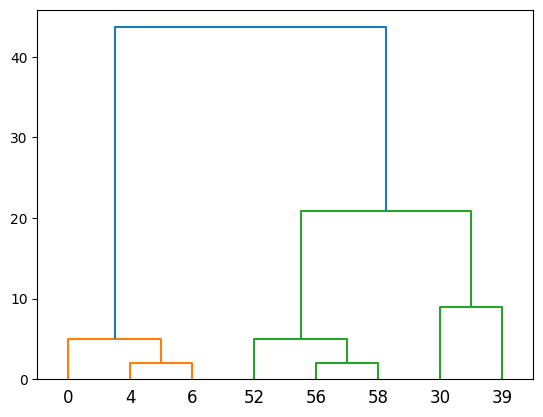

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

data = [0, 4, 6, 30, 39, 52, 56, 58]
Z = np.reshape(data,(len(data), 1))
dendrogram = sch.dendrogram(sch.linkage(Z, method='average'), labels=data)


In [2]:
airports = ['BOS', 'NY', 'CHI', 'DEN', 'SF', 'SEA']
distance = [[0, 206, 963, 1949, 3095, 2979], 
            [206, 0, 802, 1771, 2934, 2815],
            [963, 802, 0, 966, 2142, 2013],
            [1949, 1771, 966, 0, 1235, 1307],
            [3095, 2934, 2142, 1235, 0, 808],
            [2979, 2815, 2013, 1307, 808, 0]]

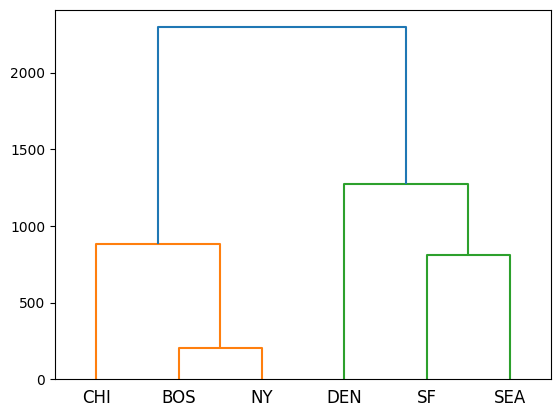

In [3]:
from scipy.spatial.distance import squareform
condensed_dist_matrix = squareform(distance)
dendrogram = sch.dendrogram(sch.linkage(condensed_dist_matrix, method='average'), labels=airports)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [5]:
dataset = make_blobs(n_samples=50, n_features=2, centers=4, cluster_std=1.6, random_state=50)

In [6]:
points = dataset[0]

In [7]:
points


array([[-0.48428125,  6.1339592 ],
       [ 0.11528327, -4.98158692],
       [ 0.09417313, -4.05882797],
       [-7.556685  , -2.42379349],
       [ 0.59860361,  3.34704241],
       [-4.73695683, -1.23390307],
       [-1.88583355, -0.65794471],
       [-1.25918778,  8.42166447],
       [-5.46469501, -1.4677575 ],
       [-5.21118763, -0.88454091],
       [-2.39128542,  9.5902579 ],
       [-3.79577694, -3.94197151],
       [-0.55798628, -2.70088621],
       [-2.84694071, 11.70447814],
       [-5.88958899, -1.47219541],
       [-0.4497762 ,  4.58102297],
       [-6.15966811, -2.13553844],
       [-0.10009538,  8.99929345],
       [-2.15963524, -7.56230415],
       [-3.51874239, -4.48330466],
       [-1.32101631, 10.72186833],
       [ 5.19455346, -3.85790517],
       [ 1.00681205, -5.97364221],
       [-1.16539558,  7.39086886],
       [-3.25968528,  5.44630828],
       [-5.39405829,  0.12384806],
       [-3.87922543,  9.49845046],
       [-2.31431452,  9.98631399],
       [-1.92013725,

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

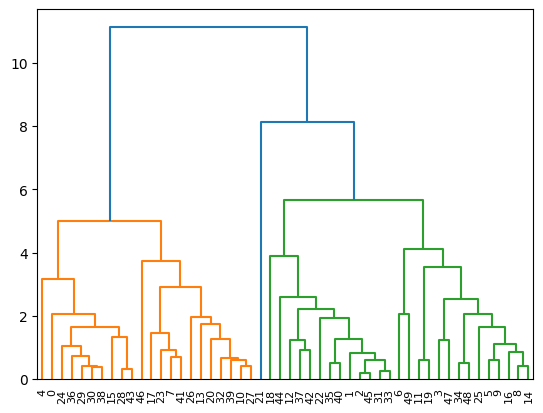

In [9]:
dendrogram = sch.dendrogram(sch.linkage(points, method='average'))

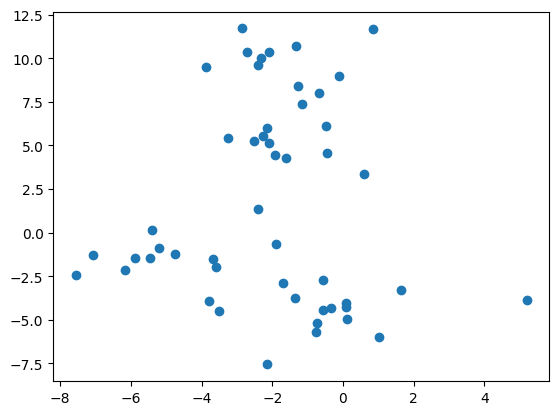

In [10]:
plt.scatter(dataset[0][:, 0], dataset[0][:,1])

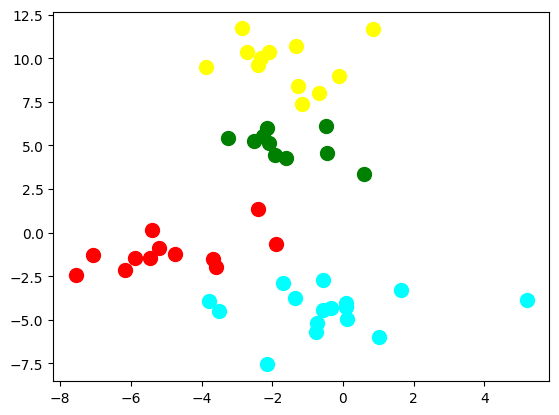

In [11]:
hc = AgglomerativeClustering(n_clusters=4, linkage='complete', metric='euclidean')
y_hc = hc.fit_predict(points)
plt.scatter(points[y_hc==0,0], points[y_hc==0,1], s=100, c='cyan')
plt.scatter(points[y_hc==1,0], points[y_hc==1,1], s=100, c='yellow')
plt.scatter(points[y_hc==2,0], points[y_hc==2,1], s=100, c='red')
plt.scatter(points[y_hc==3,0], points[y_hc==3,1], s=100, c='green')

In [12]:
import pandas as pd
loan_data = pd.read_csv("loan_data3.csv")
loan_data.head()

/tmp/ipykernel_775/1122942907.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
percent_missing = round(100*(loan_data.isnull().sum())/len(loan_data), 2)

In [15]:
percent_missing

credit_policy        0.0
purpose              0.0
int_rate             0.0
installment          0.0
log_annual_inc       0.0
dti                  0.0
fico                 0.0
days_with_cr_line    0.0
revol_bal            0.0
revol_util           0.0
inq_last_6mths       0.0
delinq_2yrs          0.0
pub_rec              0.0
not_fully_paid       0.0
dtype: float64

In [16]:
cleaned_data = loan_data.drop(['purpose', 'not_fully_paid'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   int_rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log_annual_inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days_with_cr_line  9578 non-null   float64
 7   revol_bal          9578 non-null   int64  
 8   revol_util         9578 non-null   float64
 9   inq_last_6mths     9578 non-null   int64  
 10  delinq_2yrs        9578 non-null   int64  
 11  pub_rec            9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


In [17]:
import seaborn as sb
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14, 6]
    sb.boxplot(data=df, orient='v')
    plt.title("Outliers Distribution", fontsize=16)
    plt.ylabel("Range", fontweight='bold')
    plt.xlabel("Attributes", fontweight='bold')

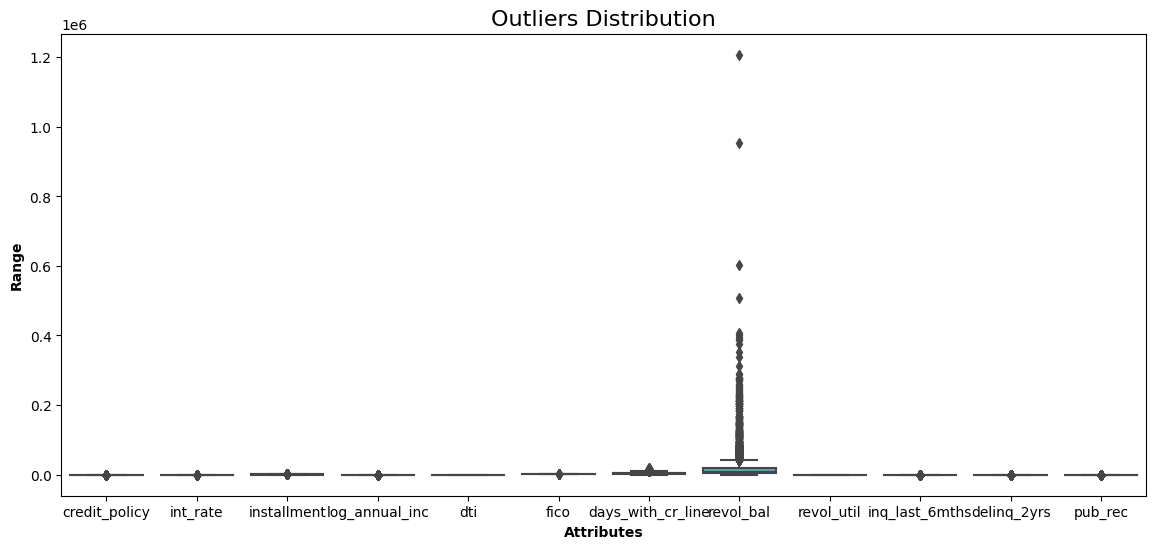

In [18]:
show_boxplot(cleaned_data)

In [19]:
def remove_outliers(data):
    df = data.copy()
    for column in list(df.columns):
        Q1 = df[str(column)].quantile(0.25)
        Q3 = df[str(column)].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[str(column)] >= lower_bound) & (df[str(column)] <= upper_bound)]
        return df

(7710, 12)

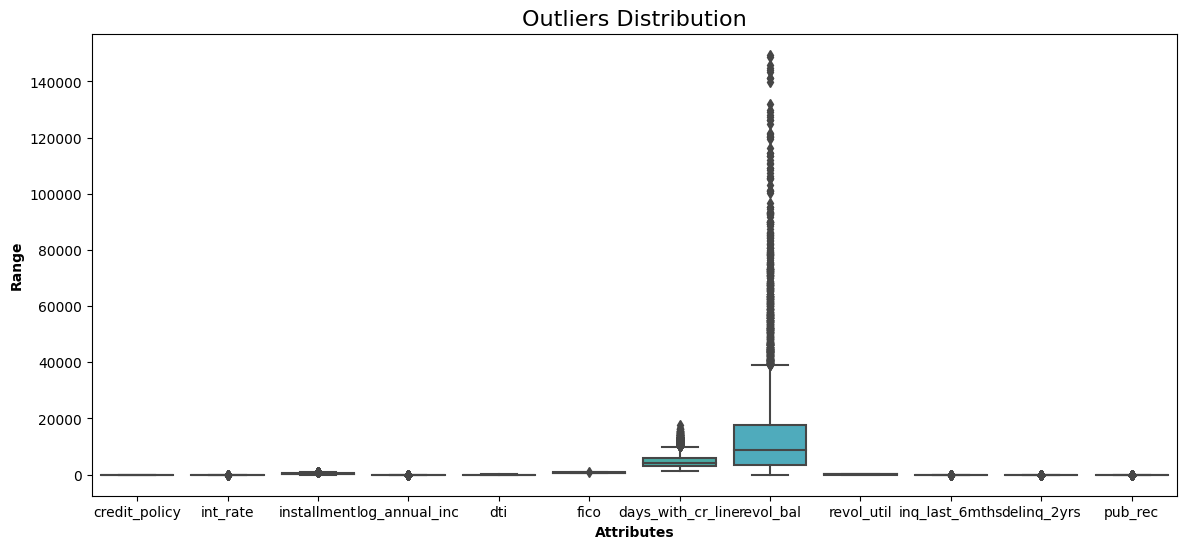

In [20]:
without_outliers = remove_outliers(cleaned_data)
show_boxplot(without_outliers)
without_outliers.shape

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(without_outliers)
scaled_data.shape
# pruned_data = scaled_data[0:5000]

(7710, 12)

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [23]:
complete_linkage = linkage(scaled_data, method='complete', metric='euclidean')
average_linkage = linkage(scaled_data, method='average', metric='euclidean')
single_linkage = linkage(scaled_data, method='single', metric='euclidean')

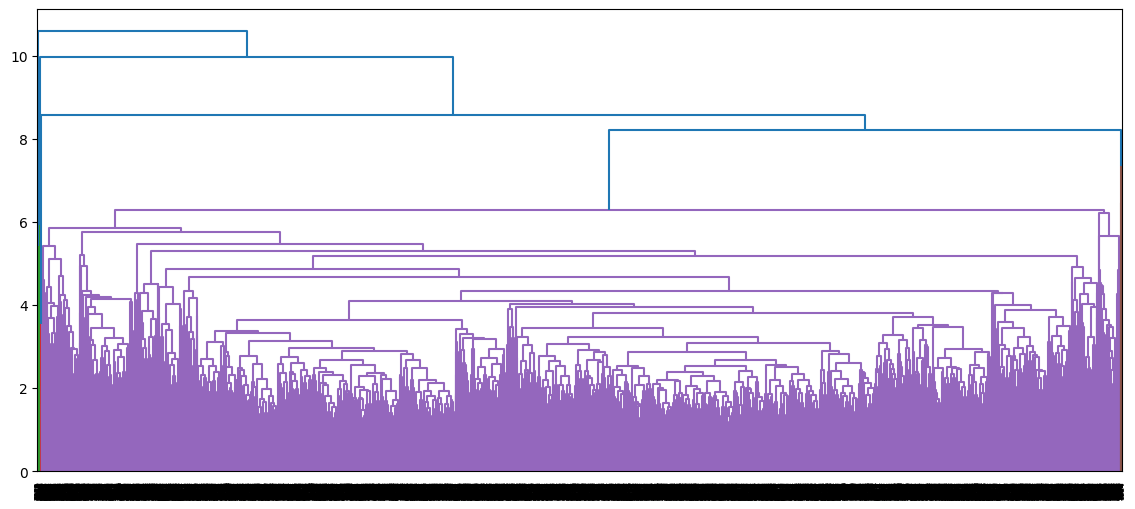

In [24]:
dendrogram(average_linkage)
plt.show()

In [25]:
cluster_labels = cut_tree(average_linkage, n_clusters=2).reshape(-1, )
# pruned_data = pd.DataFrame(pruned_data)
without_outliers['cluster'] = cluster_labels
without_outliers

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,cluster
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,1,0.1189,663.28,11.012050,2.89,742,3660.000000,6863,46.7,4,0,0,0
7706,1,0.1739,716.95,11.034890,13.51,697,4350.000000,7574,35.6,3,1,0,0
7707,1,0.1114,393.65,11.225243,7.82,737,3179.958333,10320,8.9,1,0,0,0
7708,1,0.1379,851.89,11.238489,4.45,717,5249.958333,165,2.5,2,0,0,0


<Axes: xlabel='cluster', ylabel='fico'>

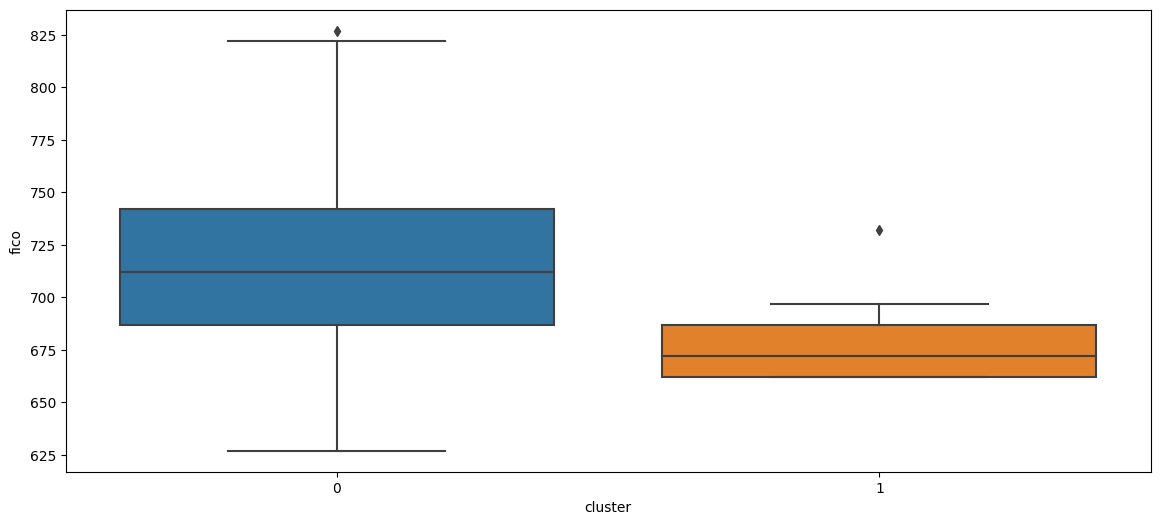

In [26]:
sb.boxplot(x='cluster', y='fico', data=without_outliers)

k-mean clustering

- k is the number of clusters that you want
- if you don't have any idea how many clusters there are this is problematic
- if you know how many clusters you want it is a good choice as it is much faster

__k-means algorithm__

- randomly choose k samples as initial controids
- while True:
- create k clusters by assigned example to the closest centroid
- compute k new centroids by averaging the examples in each cluster
- if centroids don't change
- exit

__Complecity of one iteration__
- Compare each point with each centroid k*n.
- Typically it converges quite quickly.
- Most commonly used clustering algorithm as it is very fast.

__Choosing k__
- Choosing the wrong k can be problematic
- If k is non-sensible then your clustering will be non-sensical
- How do we choose k?
- Results can depend on the initial centroids
- k-means is non-deterministic
- If the inital centroids are poorly chosen can take longer to converge or get a completely different answer.

__Choosing k__
- Choose k using a priority knowledge of the application
- For example only 5 different types of bacteria
- Two types of people in the world - DkiT graduates and not
- Try different values of k and evaluate the quality of the results.
- Run hierarchical clustering on a subset of the data
- Try and select good initial centroids distributed over the space.
- Try multiple sets of randomly chosen centroids and select the best result


__Mitigating dependence on initial centroids__
- best = k-means(points)
- for t in range(numTrials):
- C = k-means(points)
- if dissimilarity(C) < dissimilarity(best)
- best = C
- return best

- Think of a centroid as the "centre of gravity" of a cluster

__Elbow method to find k__
- $SSE_1 = \sum_{i=0}^ndist(x_i-c_1)^2$
- $SSE = SSE_1 + \dots + SSE_n$


In [27]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [28]:
df = pd.read_csv("income.csv")

In [29]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohen,29,61000
3,Ismail,28,60000
4,Kory,42,150000


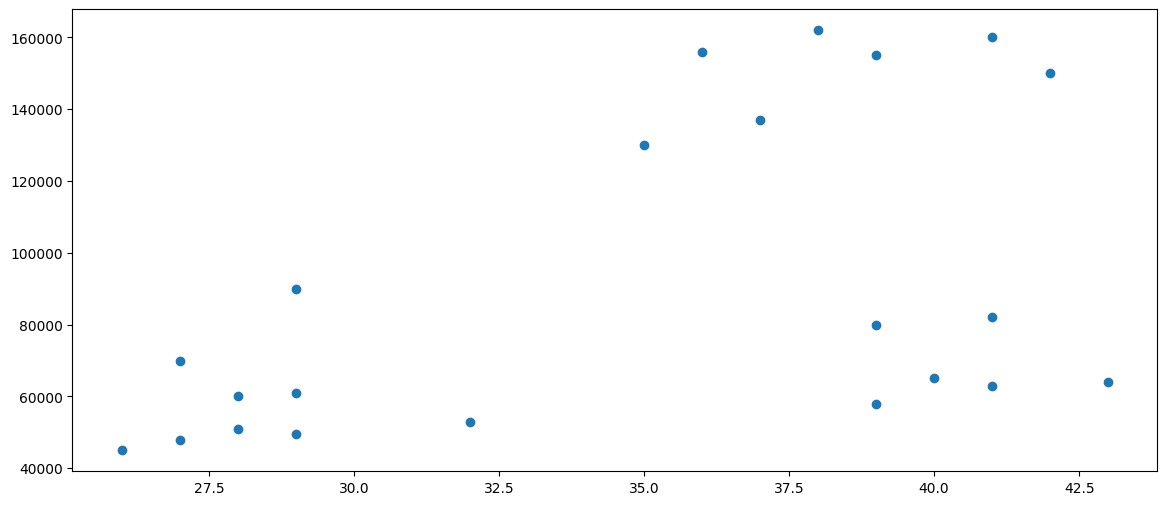

In [30]:
plt.scatter(df['Age'], df['Income'])

In [31]:
km = KMeans(n_clusters=3, n_init='auto')
km

KMeans(n_clusters=3)

In [32]:
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [33]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohen,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


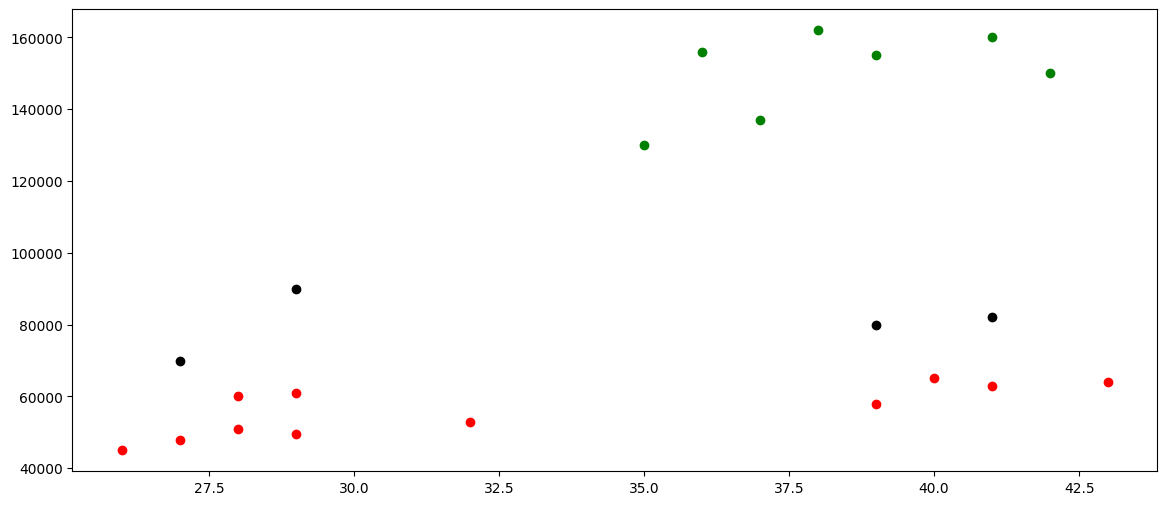

In [34]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')

- Problematic as features are not scaled
- Income 40,000 -> 165,000
- Age 25-45
- Income will completely dominate unless scaled. If you don't scale the data you might as well forget about age as the scale for income is 1000 bigger

In [35]:
scalar = MinMaxScaler()
scalar.fit(df[['Income']])
df['Income'] = scalar.transform(df[['Income']])

In [36]:
df

,Name,Age,Income,cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohen,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0
5,Guatam,39,0.940171,0
6,David,41,0.982906,0
7,Andrea,38,1.000000,0
8,Brad,36,0.948718,0
9,Angelina,35,0.726496,0


In [37]:
scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])

In [38]:
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohen,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Guatam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [42]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])
df['cluster'] = y_predicted

In [43]:
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohen,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Guatam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


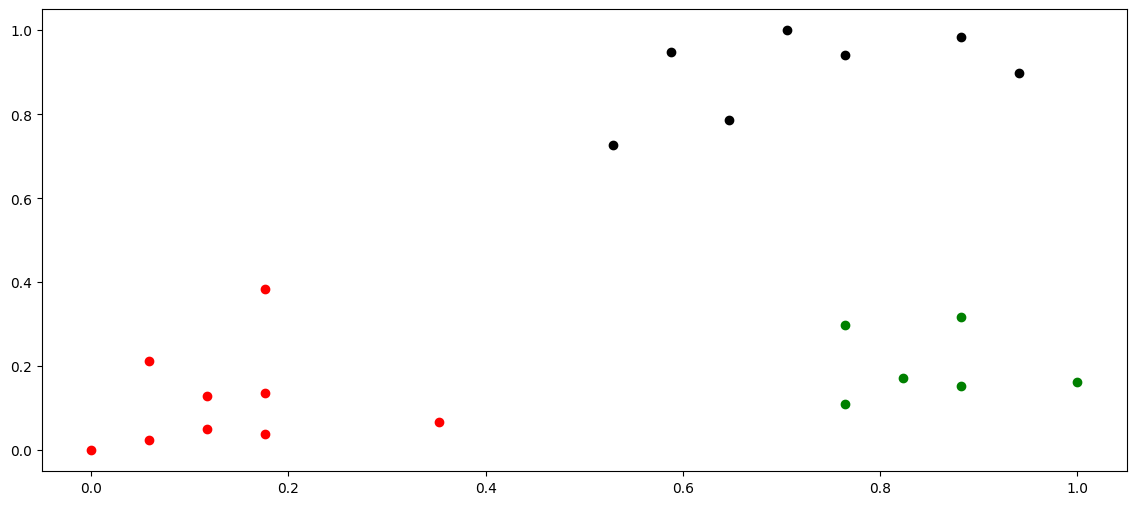

In [44]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')

In [45]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

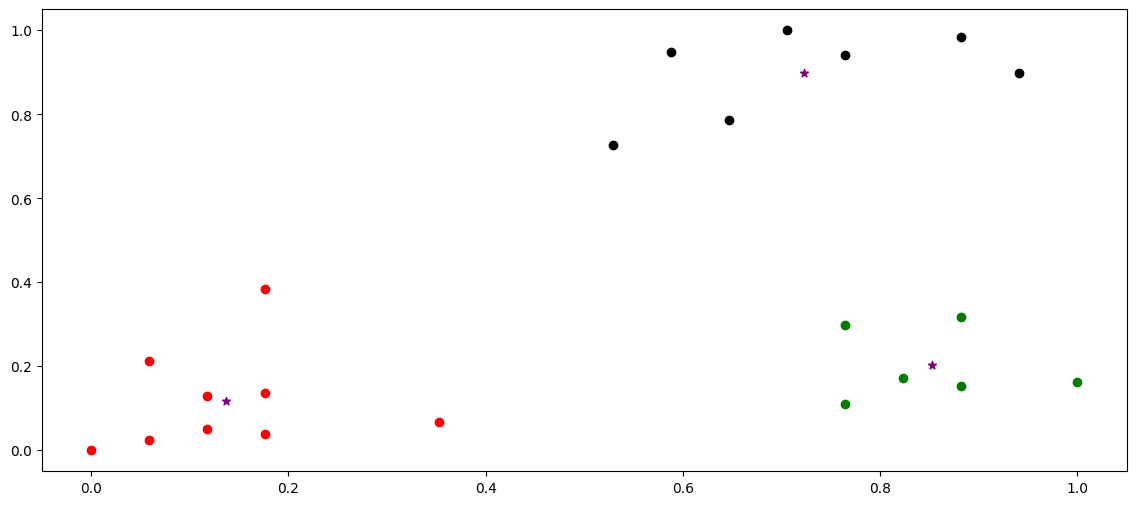

In [46]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

In [47]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [48]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

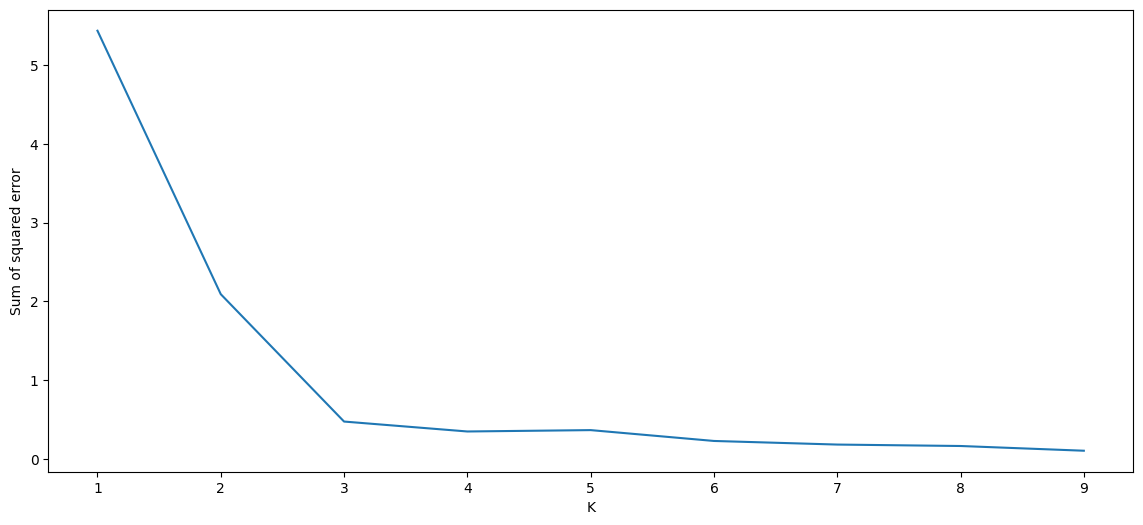

In [49]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

__DBSCAN__

- Density Based Spatial Clustering of Applications with Noise (DBSCAN)
- Clusters are dense regions in the data space, seperated by regions of lower density.
- DBSCAN is based in this intuitive notion of "Clusters" and "noise".
- The key idea is that for each point of a cluster, the  neighbourhood of a given radius has to contain at least a given number of points.
- Particioning methods (K-means) and hierarchical clustering work for finding spherical shaped or convex clusters. In other words, they are suitable for compact and well seperated clusters. They are also severely impacted by the presence of noise or outliers.
- Real life data can contain clusters of arbitrary shape and can contain noise.

__Parameters required__
- __eps__ It defines 